## Михеев Иван М05-013Б

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Возьмем уже готовый SSA с Git, чтобы не прописывать все с самого 0


In [ ]:
!git clone https://github.com/aj-cloete/pssa.git
%cd pssa
from mySSA import mySSA

Cloning into 'pssa'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 110 (delta 13), reused 72 (delta 7), pack-reused 30
Receiving objects: 100% (110/110), 1.51 MiB | 3.32 MiB/s, done.
Resolving deltas: 100% (23/23), done.
/content/pssa/pssa


### Данные взял с Kagle. Количество произведенного пива какой-то пивоварней в месяц за 40 лет.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/MMP/monthly-beer-production-in-austr.csv', parse_dates=True, index_col='Month')
data

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
...,...
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0


In [ ]:
data['Monthly beer production'] = data['Monthly beer production'].astype('float')
ssa = mySSA(data)

In [ ]:
[x for x in dir(ssa) if '__' not in x and x[0]!='_']

['decompose',
 'diagonal_averaging',
 'embed',
 'forecast_recurrent',
 'freq',
 'get_contributions',
 'ts',
 'ts_N',
 'ts_name',
 'ts_v',
 'view_reconstruction',
 'view_s_contributions',
 'view_time_series']

In [ ]:
K = 20
suspected_seasonality = 6
ssa.embed(embedding_dimension=40, suspected_frequency=suspected_seasonality, verbose=True)

----------------------------------------
EMBEDDING SUMMARY:
Embedding dimension	:  36
Trajectory dimensions	: (36, 441)
Complete dimension	: (36, 441)
Missing dimension     	: (36, 0)


Магическая библиотека.. ниже показывает количество влияющий сигналов при моделировании времянного ряда

In [ ]:
ssa.decompose(verbose=True)

----------------------------------------
DECOMPOSITION SUMMARY:
Rank of trajectory		: 36
Dimension of projection space	: 33
Characteristic of projection	: 0.9999


А тут получаем важность каждого сигнала при моделировании

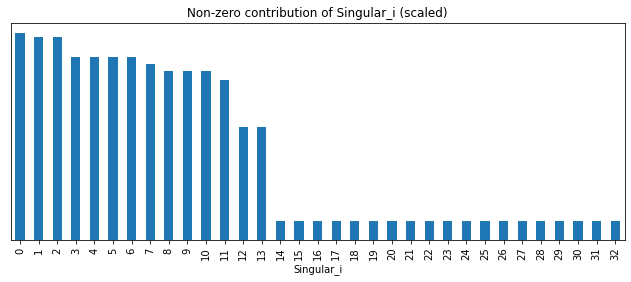

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 11, 4
ssa.view_s_contributions(adjust_scale=True)

## Разложим изначальный ряд на 5 первых по важности рядов, посмотрим как они выгледят 


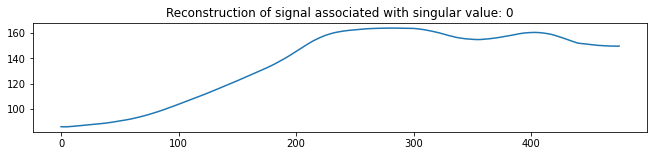

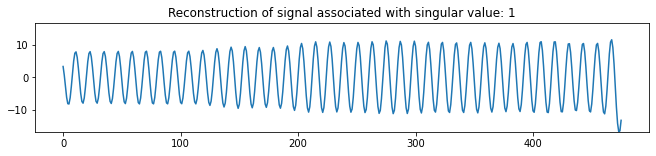

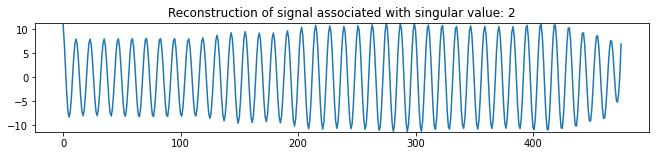

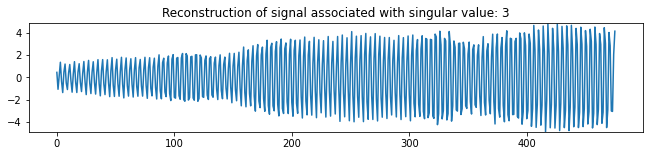

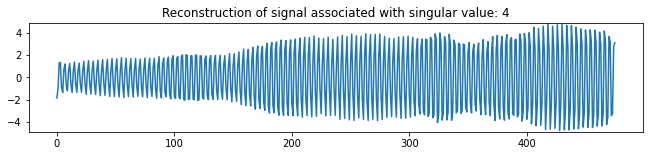

In [302]:
rcParams['figure.figsize'] = 11, 2
for i in range(5):
    ssa.view_reconstruction(ssa.Xs[i], names=i, symmetric_plots=i!=0)
rcParams['figure.figsize'] = 11, 4

##Посмотрим на изначальный ряд и сконтруируем из полученных 5 рядов свой

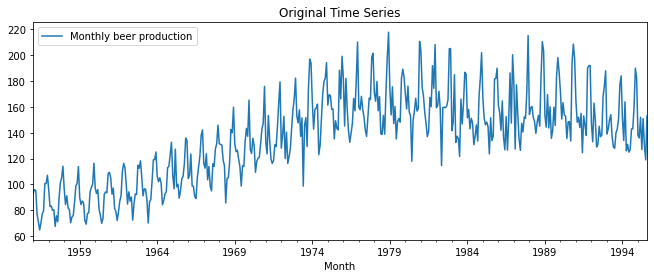

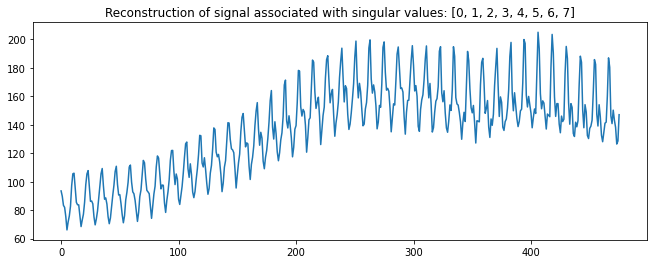

In [303]:
ssa.ts.plot(title='Original Time Series')
streams5 = [i for i in range(8)]
reconstructed5 = ssa.view_reconstruction(*[ssa.Xs[i] for i in streams5], names=streams5, return_df=True)

## Сравним их на одном графике

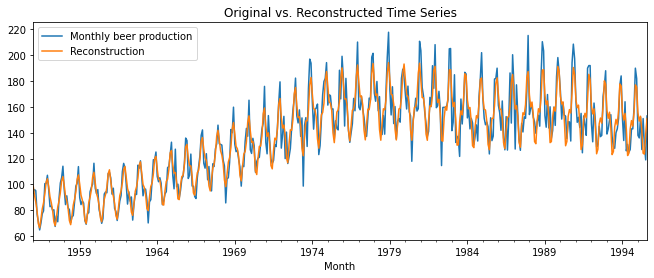

In [ ]:
ts_copy5 = ssa.ts.copy()
ts_copy5['Reconstruction'] = reconstructed5.Reconstruction.values
ts_copy5.plot(title='Original vs. Reconstructed Time Series')

## А теперь добавим следующие 5 разложений и посмотрим как это будет выглядеть 

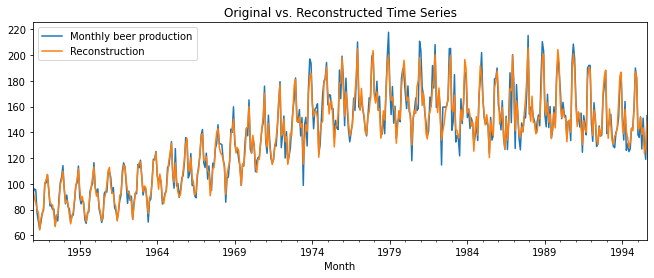

In [ ]:
streams10 = [i for i in range(10)]
reconstructed10 = ssa.view_reconstruction(*[ssa.Xs[i] for i in streams10], 
                                          names=streams10, return_df=True, plot=False)
ts_copy10 = ssa.ts.copy()
ts_copy10['Reconstruction'] = reconstructed10.Reconstruction.values
ts_copy10.plot(title='Original vs. Reconstructed Time Series')


## Посмотрим на краткосрочный прогноз

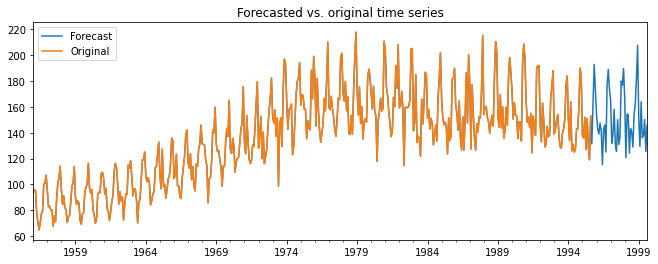

In [ ]:
ssa.forecast_recurrent(steps_ahead=48, singular_values=streams10, plot=True)

##Посмотрим на долгосрочный прогноз

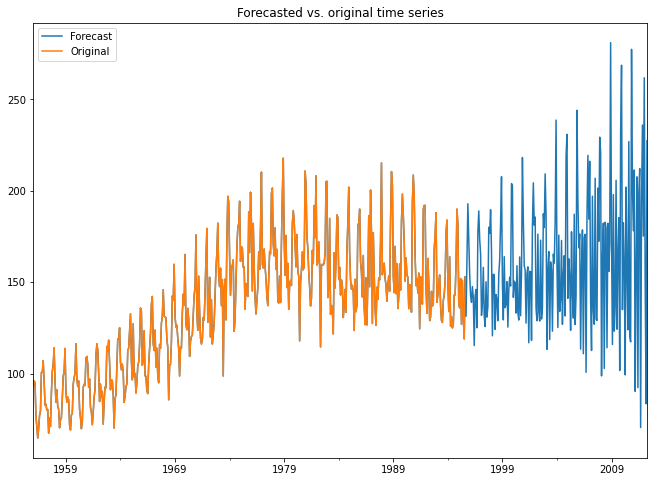

In [304]:
rcParams['figure.figsize'] = 11,8
ssa.forecast_recurrent(steps_ahead=200, singular_values=streams10, plot=True)
rcParams['figure.figsize'] = 11, 4

## Нуууу.... в целом на следущих 10 лет прогноз выглядит реалистично 